<a href="https://colab.research.google.com/github/KazukiHirata-sun/ITSS-react-drf-basic/blob/main/section_1/Classification_with_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster
Use the PyCaret library to implement machine learning with [AutoML](https://www.automl.org/automl/).
Predict the survivors of the Titanic.
The prediction results from the trained model can be saved to a csv file and submitted to [Kaggle](https://www.kaggle.com/).

**Classification：https://www.simplilearn.com/tutorials/machine-learning-tutorial/classification-in-machine-learning**

## Installation of PyCaret
Install [PyCaret](https://pycaret.gitbook.io/docs/), a library that supports AutoML, specifying the version.

In [ ]:
!pip install pycaret==2.3.6
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 50.4 MB/s 
     |████████████████████████████████| 262 kB 73.7 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 17.0 MB 201 kB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 6.8 MB 40.0 MB/s 
     |████████████████████████████████| 1.7 MB 62.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 10.4 MB 38.9 MB/s 
     |████████████████████████████████| 1.3 MB 57.3 MB/s 
     |████████████████████████████████| 134 kB 59.9 MB/s 
     |████████████████████████████████| 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 5.0 MB/s 
     |████████████████████████████████| 3.1 MB 30.1 MB/s 
     |████████████████████████████████| 303 kB 71.4 MB/s 
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.2.0
    Uninstalling tangled-up-in-unicode-0.2.0:
      Successfully uninstalled tangled-up-in-unicode-0.2.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.2.0
    Uninstalling pandas-profiling-3.2.0:
      Successfully uninstalled pandas-profiling-3.2.0


In [ ]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


## Read the files
Dowload the Titanic passenger data from the following page and upload "train.csv" and "test.csv" to your Google Clab.

https://www.kaggle.com/c/titanic/data

The train data has a "Survived" column to indicate if a passenger survived, but the test data does not.
You will need to submit the results of the test data input into the trained model.

In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("input/train.csv")  # train data
test_data = pd.read_csv("input/test.csv") # test data

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Setup PyCaret's environment

`setup()` function initializes the PyCaret environment, but must be called before any other PyCaret functions are executed.

If the data type is OK, you can complete the setup by entering a blank space.

Since some of the data in this case is missing, we need to set up a response for the missing data.

Missing numerical data will be assigned the mean value by setting `numeric_imputation="mean"` and missing categorical data will be assigned the mode value by setting  `categorical_imputation="mode"`.

https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation#parameters

In [ ]:
from pycaret.classification import setup

clf = setup(data=train_data, target="Survived", session_id=123,
            numeric_imputation="mean", categorical_imputation="mode")

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['PassengerId'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Survived',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

## Model Performance Comparison
Compare various models to evaluate their performance.

`compare_models()` function trains with all models in the library and evaluates their scores.

https://pycaret.gitbook.io/docs/get-started/functions/train?q=compare_models



In [ ]:
from pycaret.classification import compare_models

best_model = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8155,0.8576,0.6963,0.8098,0.7474,0.6032,0.6087,0.516
lr,Logistic Regression,0.8122,0.8576,0.7498,0.7689,0.7583,0.6047,0.6060,0.662
ridge,Ridge Classifier,0.8075,0.0000,0.7297,0.7694,0.7484,0.5926,0.5937,0.045
dt,Decision Tree Classifier,0.8042,0.7909,0.7295,0.7648,0.7446,0.5862,0.5886,0.052
rf,Random Forest Classifier,0.8042,0.8642,0.6685,0.7987,0.7266,0.5764,0.5828,0.612
ada,Ada Boost Classifier,0.7978,0.8485,0.7052,0.7685,0.7325,0.5705,0.5746,0.234
et,Extra Trees Classifier,0.7978,0.8494,0.6605,0.7894,0.7182,0.5629,0.5690,0.605
lightgbm,Light Gradient Boosting Machine,0.7849,0.8566,0.7045,0.7422,0.7180,0.5450,0.5496,0.116
lda,Linear Discriminant Analysis,0.7368,0.7501,0.6427,0.6753,0.6558,0.4431,0.4458,0.225
knn,K Neighbors Classifier,0.6919,0.7300,0.5865,0.6148,0.5984,0.3492,0.3509,0.157


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


With just one line of code, we were able to train and evaluate over 15 machine learning models.

A summary of the best scoring models is shown below.

In [ ]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Build Models
`models()` function allows you to see all available machine learning models.

https://pycaret.gitbook.io/docs/get-started/functions/others#models

In [ ]:
from pycaret.classification import models

models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


`create_model()` function trains and evaluates individual models using "[cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,k%2Dfold%20cross%2Dvalidation.)".

In this case, we will create a model for the [Gradient Boosting Classifier](https://blog.paperspace.com/gradient-boosting-for-classification/), which had the highest accuracy.

https://pycaret.gitbook.io/docs/get-started/functions/train#create_model


In [ ]:
from pycaret.classification import create_model

gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8542,0.7600,0.9048,0.8261,0.7273,0.7341
1,0.7937,0.8716,0.7200,0.7500,0.7347,0.5660,0.5663
2,0.7460,0.8300,0.6800,0.6800,0.6800,0.4695,0.4695
3,0.8226,0.8076,0.7200,0.8182,0.7660,0.6240,0.6273
4,0.7419,0.7736,0.5833,0.7000,0.6364,0.4389,0.4433
5,0.8387,0.8925,0.6667,0.8889,0.7619,0.6437,0.6589
6,0.8065,0.8761,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.8871,0.9397,0.7917,0.9048,0.8444,0.7565,0.7606
8,0.8387,0.8794,0.7500,0.8182,0.7826,0.6548,0.6564
9,0.8065,0.8514,0.6250,0.8333,0.7143,0.5724,0.5860


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
 print(gbc) ## Trained Model Overview

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Hyperparameter tuning
`tune_model()` function is used to optimize hyperparameters.

https://pycaret.gitbook.io/docs/get-started/functions/optimize#tune_model

In [ ]:
from pycaret.classification import tune_model

tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8753,0.7200,0.8182,0.7660,0.6276,0.6309
1,0.8095,0.8558,0.8000,0.7407,0.7692,0.6075,0.6088
2,0.7460,0.7637,0.6400,0.6957,0.6667,0.4621,0.4632
3,0.7419,0.7924,0.7200,0.6667,0.6923,0.4707,0.4717
4,0.7097,0.7412,0.6250,0.6250,0.6250,0.3882,0.3882
5,0.8226,0.8761,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.7581,0.8788,0.5833,0.7368,0.6512,0.4698,0.4773
7,0.8871,0.9430,0.8750,0.8400,0.8571,0.7639,0.7643
8,0.8065,0.8651,0.7917,0.7308,0.7600,0.5983,0.5996
9,0.8387,0.8755,0.7083,0.8500,0.7727,0.6493,0.6558


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Analys model
Plot the importance of each feature using `plot_model()` function.

https://pycaret.gitbook.io/docs/get-started/functions/analyze#plot_model


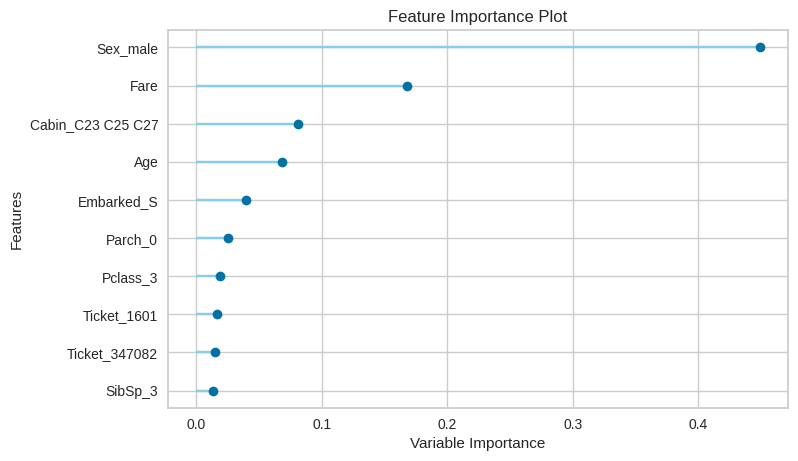

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
from pycaret.classification import plot_model

plot_model(tuned_gbc, plot="feature")

## Build models for submission to Kaggle
`finalize_model()` function trains the model with all the training data and creates a model for production.

In [ ]:
from pycaret.classification import finalize_model

final_gbc = finalize_model(tuned_gbc)
print(final_gbc)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', m

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Predictions are made using test data.

Prediction results include a "Label" column representing the class to be classified and a "Score" label representing the probability of being in that class.

In [ ]:
from pycaret.classification import predict_model

test_pred = predict_model(final_gbc, data=test_data)  # Prediction
test_pred.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8554
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.7024
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8027
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.9298
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.5451


Save the csv file for submission to Kaggle.

In [ ]:
subm_data = test_pred[["PassengerId", "Label"]]  # Extract the required columns.

subm_data = subm_data.rename(columns={"Label" : "Survived"})  # 

# Save the csv file
subm_data.to_csv("submission_titanic.csv", index=False)

subm_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
